# Book Recommedation System

### What is recommendation system?

If we want to buy any product we normally take a suggestion from friends, read product reviews on internet and then we make our decision. But to make it more easy and convenient we have recommendation system.

#### Recommendation system predicts buyer’s interest and recommend product to them accordingly.

###### Types of Recommendation System

1. Popularity based recommendation system

2. Content based recommendation system

3. Collaborative based recommendation system

4. Hybrid recommendation system

###### Popularity based recommendation system:

This type of recommender system suggests the product based on trend. if the product is purchased by many users then that will be suggested to new users. Example: Trending section on YouTube

###### Content based recommendation system:

This type of recommender system suggests the product based on user interest. if user search for any product then it will suggest similar products to user. Example: Netflix movie suggestions

###### Collaborative based recommendation system:

This type of recommender system suggests the product based on user.if user search for any product then it will try to search similar user and based on similar user interest it will suggest products.

###### Hybrid recommendation system:

It is basically a combination of Content based and Collaborative based recommendation systems. This complex model recommends product based on user search as well based on similar users .


### Summary

1. Data cleaning was performed on the books rating data to suit the analysis

2. Performed cosine-similarity on book information to provide content-based recommendation based on the books author, publication year, and publisher

3. Use the rating dataframe to make item-based collaborative recommendation for certain user

In [1]:
# Import Dependancies...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Datasets....

books = pd.read_csv('Books.csv',low_memory=False, encoding="latin-1")
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

In [3]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
# Check shape of datasets..

print('books: ', books.shape)
print('users: ', users.shape)
print('ratings: ', ratings.shape)

books:  (271360, 8)
users:  (278858, 3)
ratings:  (1149780, 3)


In [7]:
# Check missing Values..

print("books:"'\n',books.isnull().sum())
print('*'*50)
print("users:"'\n', users.isnull().sum(),'/n')
print('*'*50)
print("ratings:"'\n', ratings.isnull().sum())

books:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
**************************************************
users:
 User-ID          0
Location         0
Age         110762
dtype: int64 /n
**************************************************
ratings:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [8]:
# lets check duplicate values in datasets..

print('books: ',books.duplicated().sum())
print('users: ',users.duplicated().sum())
print('ratings: ',ratings.duplicated().sum())

books:  0
users:  0
ratings:  0


In [9]:
count_top_books = pd.value_counts(books['Book-Title']).iloc[0:10].index
count_top_books

Index(['Selected Poems', 'Little Women', 'Wuthering Heights',
       'The Secret Garden', 'Dracula', 'Adventures of Huckleberry Finn',
       'Jane Eyre', 'The Night Before Christmas', 'Pride and Prejudice',
       'Great Expectations'],
      dtype='object', name='Book-Title')

Text(0.5, 1.0, 'Top 10 Popular Books')

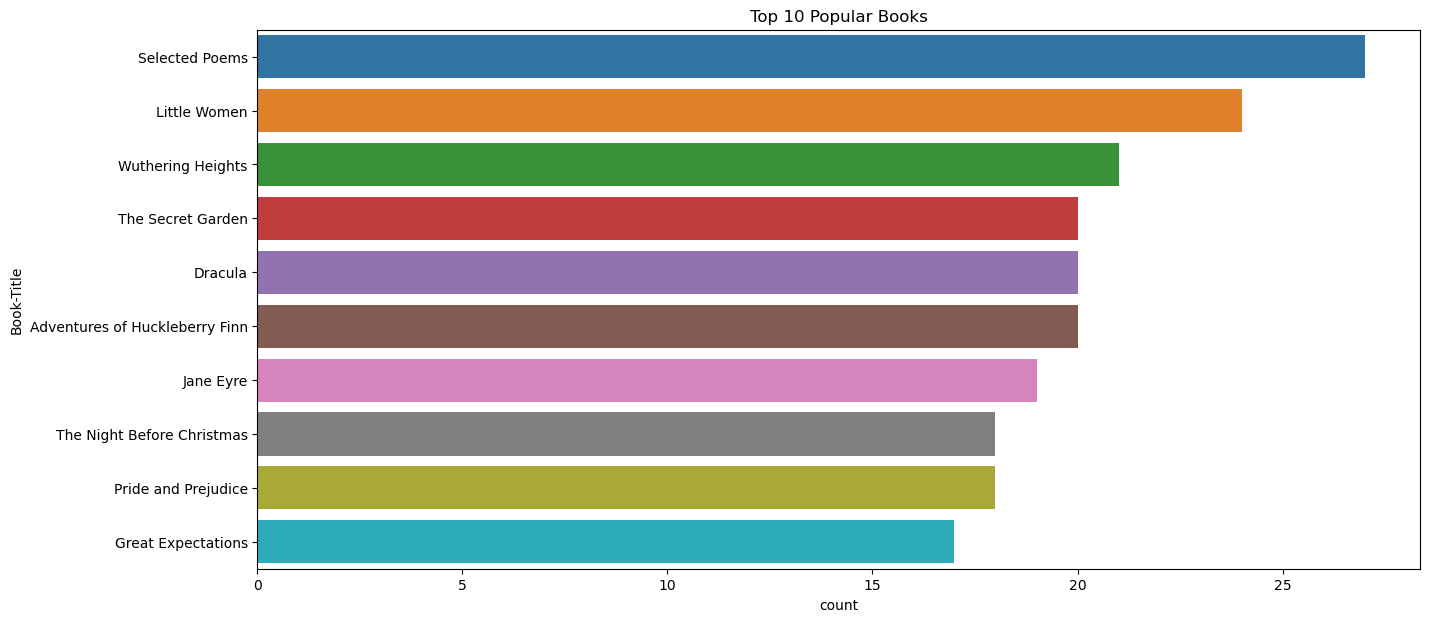

In [10]:
# top 10 popular books...
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Title', data=books, order=count_top_books)
plt.title('Top 10 Popular Books')

In [11]:
count_top_authors = pd.value_counts(books['Book-Author']).iloc[0:10].index
count_top_authors

Index(['Agatha Christie', 'William Shakespeare', 'Stephen King',
       'Ann M. Martin', 'Carolyn Keene', 'Francine Pascal', 'Isaac Asimov',
       'Nora Roberts', 'Barbara Cartland', 'Charles Dickens'],
      dtype='object', name='Book-Author')

Text(0.5, 1.0, 'Top 10 Book-Authors')

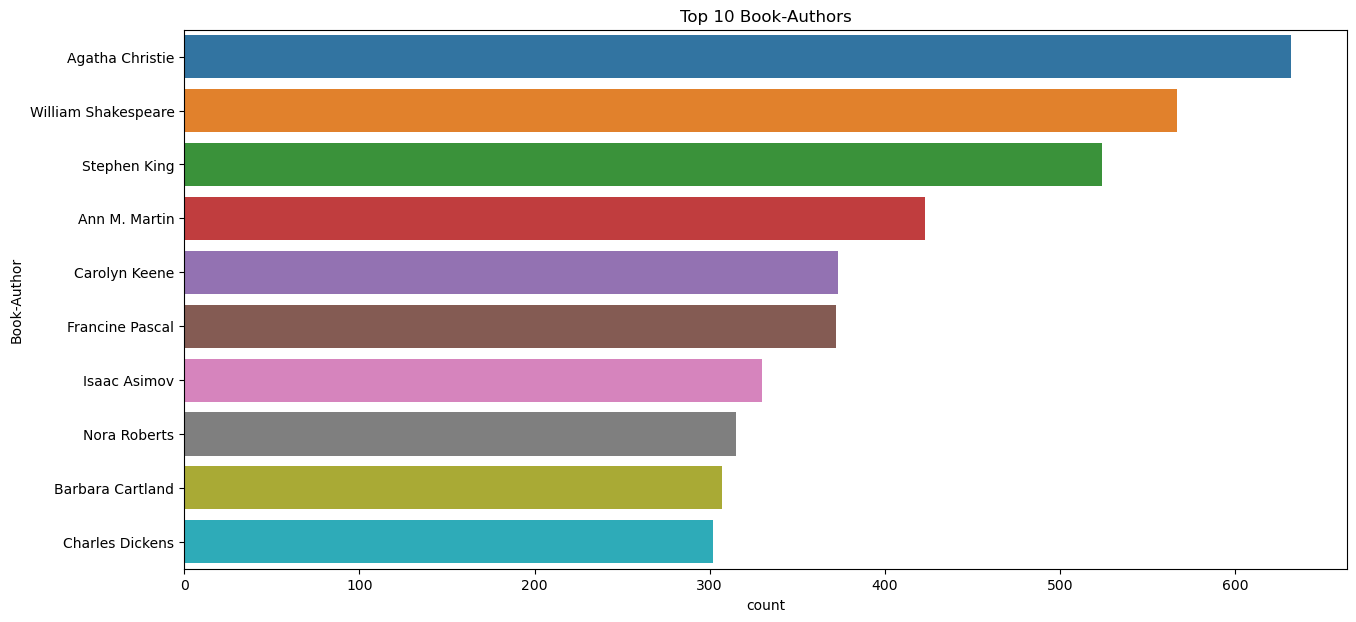

In [12]:
# top 10 Authers...
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author', data=books, order=count_top_authors)
plt.title('Top 10 Book-Authors')

In [13]:
count_top_ratings = pd.value_counts(ratings['Book-Rating']).index
count_top_ratings

Index([0, 8, 10, 7, 9, 5, 6, 4, 3, 2, 1], dtype='int64', name='Book-Rating')

Text(0.5, 1.0, 'Ratings')

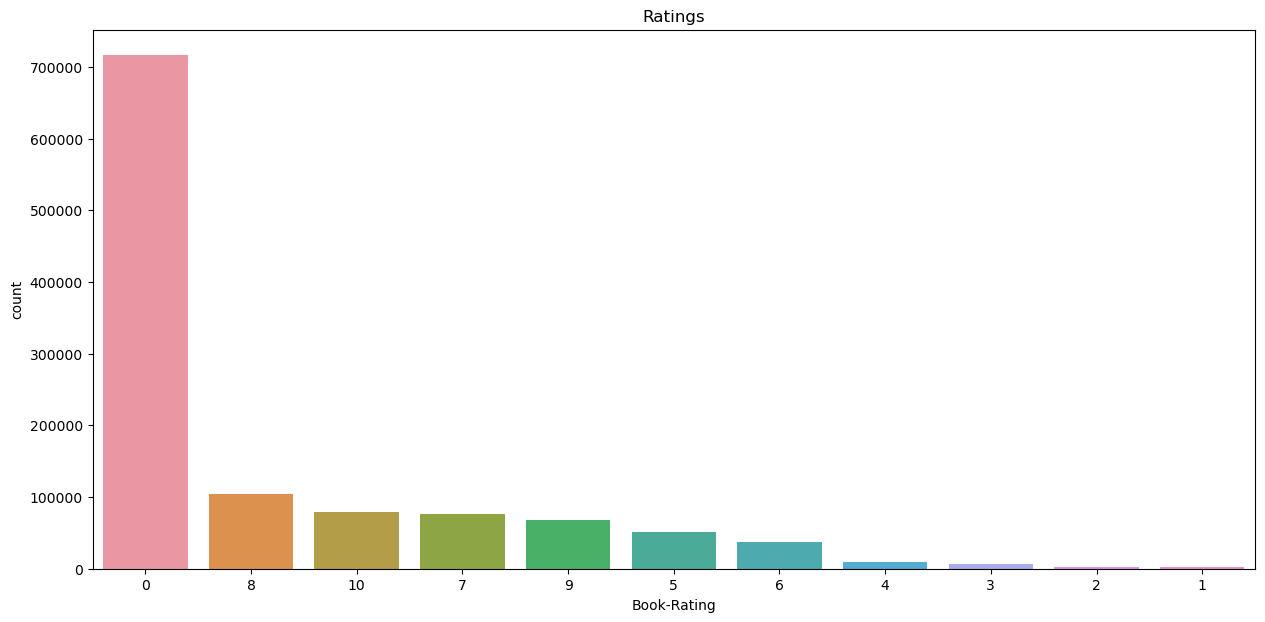

In [14]:
# lets see how ratings distributed....
plt.figure(figsize=(15,7))
sns.countplot(x='Book-Rating', data=ratings, order=count_top_ratings)
plt.title("Ratings")

### Merge books and ratings datasets...

In [15]:
df = ratings.merge(books, on='ISBN')
print('shape of new datasets ', df.shape)

shape of new datasets  (1031136, 10)


In [16]:
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


# Popular Based Recommender System

In [17]:
# Lets Count Number Of Ratings On Each Books.....

num_ratings_df = df.groupby('Book-Title').count()['Book-Rating'].reset_index()

In [18]:
num_ratings_df.rename(columns={'Book-Rating': 'Num-Rating'}, inplace=True)

In [19]:

num_ratings_df


,Book-Title,Num-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Ã?lpiraten.,2
241067,Ã?Ã?rger mit Produkt X. Roman.,4
241068,Ã?Ã?sterlich leben.,1
241069,Ã?Ã?stlich der Berge.,3


In [20]:
# Now Lets check Average Ratings of Books...

avg_ratings_df = df.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()

In [21]:
avg_ratings_df = avg_ratings_df.rename(columns={'Book-Rating': 'Avg-Rating'})
avg_ratings_df

,Book-Title,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Ã?lpiraten.,0.000000
241067,Ã?Ã?rger mit Produkt X. Roman.,5.250000
241068,Ã?Ã?sterlich leben.,7.000000
241069,Ã?Ã?stlich der Berge.,2.666667


In [22]:
# Now merge both num_ratings_df and avg_rating_df
popular_df = num_ratings_df.merge(avg_ratings_df, on='Book-Title')

In [23]:
popular_df

,Book-Title,Num-Rating,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Ã?lpiraten.,2,0.000000
241067,Ã?Ã?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Ã?sterlich leben.,1,7.000000
241069,Ã?Ã?stlich der Berge.,3,2.666667


In [24]:
# Now Lets take only users who gave ratings more then 250 times...

popular_df = popular_df[popular_df['Num-Rating']>=250].sort_values('Avg-Rating', ascending=False).head(50)

In [25]:
popular_df.shape

(50, 3)

In [26]:
popular_df.head()

,Book-Title,Num-Rating,Avg-Rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


In popular_df, we get top 50 recommended books, which are popular with high numbers of ratings and high average ratings 

In [27]:
# For add more details of top 50 recommended book, we merge books datasets with popular df..

final_popular_df = popular_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 
                                                                                           'Num-Rating','Avg-Rating','Image-URL-M']]

In [28]:
final_popular_df

,Book-Title,Book-Author,Num-Rating,Avg-Rating,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,5.852804,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,5.824289,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,278,5.737410,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,347,5.501441,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,556,5.183453,http://images.amazon.com/images/P/0439064872.0...
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,281,5.007117,http://images.amazon.com/images/P/0345339681.0...
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,368,4.948370,http://images.amazon.com/images/P/0345339703.0...
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,575,4.895652,http://images.amazon.com/images/P/059035342X.0...
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,260,4.880769,http://images.amazon.com/images/P/0345339711.0...
39,To Kill a Mockingbird,Harper Lee,510,4.700000,http://images.amazon.com/images/P/0446310786.0...


# 
# Collaborative based recommendation system

In [29]:
x = df.groupby('User-ID').count()['Book-Rating'] > 200
Top_users = x[x].index

In [30]:
filtered_rating = df[df['User-ID'].isin(Top_users)]

In [31]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [32]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [33]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [34]:
pt.fillna(0,inplace=True)

In [35]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
similarity_scores = cosine_similarity(pt)

In [38]:
similarity_scores.shape

(706, 706)

In [39]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [40]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [41]:
pt.index[545]

"The Handmaid's Tale"

In [42]:
import pickle
pickle.dump(final_popular_df,open('popular.pkl','wb'))

In [43]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [44]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [45]:
final_popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [ ]:
  {% if loop.index % 5 == 1 %}
            <div style="display: flex; flex-basis: 100%;">
            {% endif %}
              
                <img src="{{i[2]}}" alt="Book_image">
                <h4 style="font-weight: bold;">{{ i[0] }}</h4>
                <h5>{{ i[1] }}</h5>
            </div>
          </div>
          {% if loop.index % 5 == 0 or loop.last %}
            </div>
            {% endif %}